In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%pip install scipy
%pip install seaborn
import seaborn as sns
import sklearn
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
dataset = pd.read_csv('../data/cardio.csv')

In [26]:
dataset

,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,0,0,1,0
1,20228,1,156,85.0,140,90,1,0,0,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,0,0,1,1
69997,19066,2,183,105.0,180,90,1,0,1,0,1
69998,22431,1,163,72.0,135,80,2,0,0,0,1


In [27]:
result = pd.DataFrame()
result['diagnosis'] = dataset.iloc[:,0]

In [28]:
result

,diagnosis
0,18393
1,20228
2,18857
3,17623
4,17474
...,...
69995,19240
69996,22601
69997,19066
69998,22431


In [29]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

/var/folders/p4/c1zx4_5x49593zz7wfshc8bh0000gn/T/ipykernel_4028/4193601653.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
/Users/saim_bhimji/Library/Python/3.9/lib/python/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/var/folders/p4/c1zx4_5x49593zz7wfshc8bh0000gn/T/ipykernel_4028/4193601653.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplo

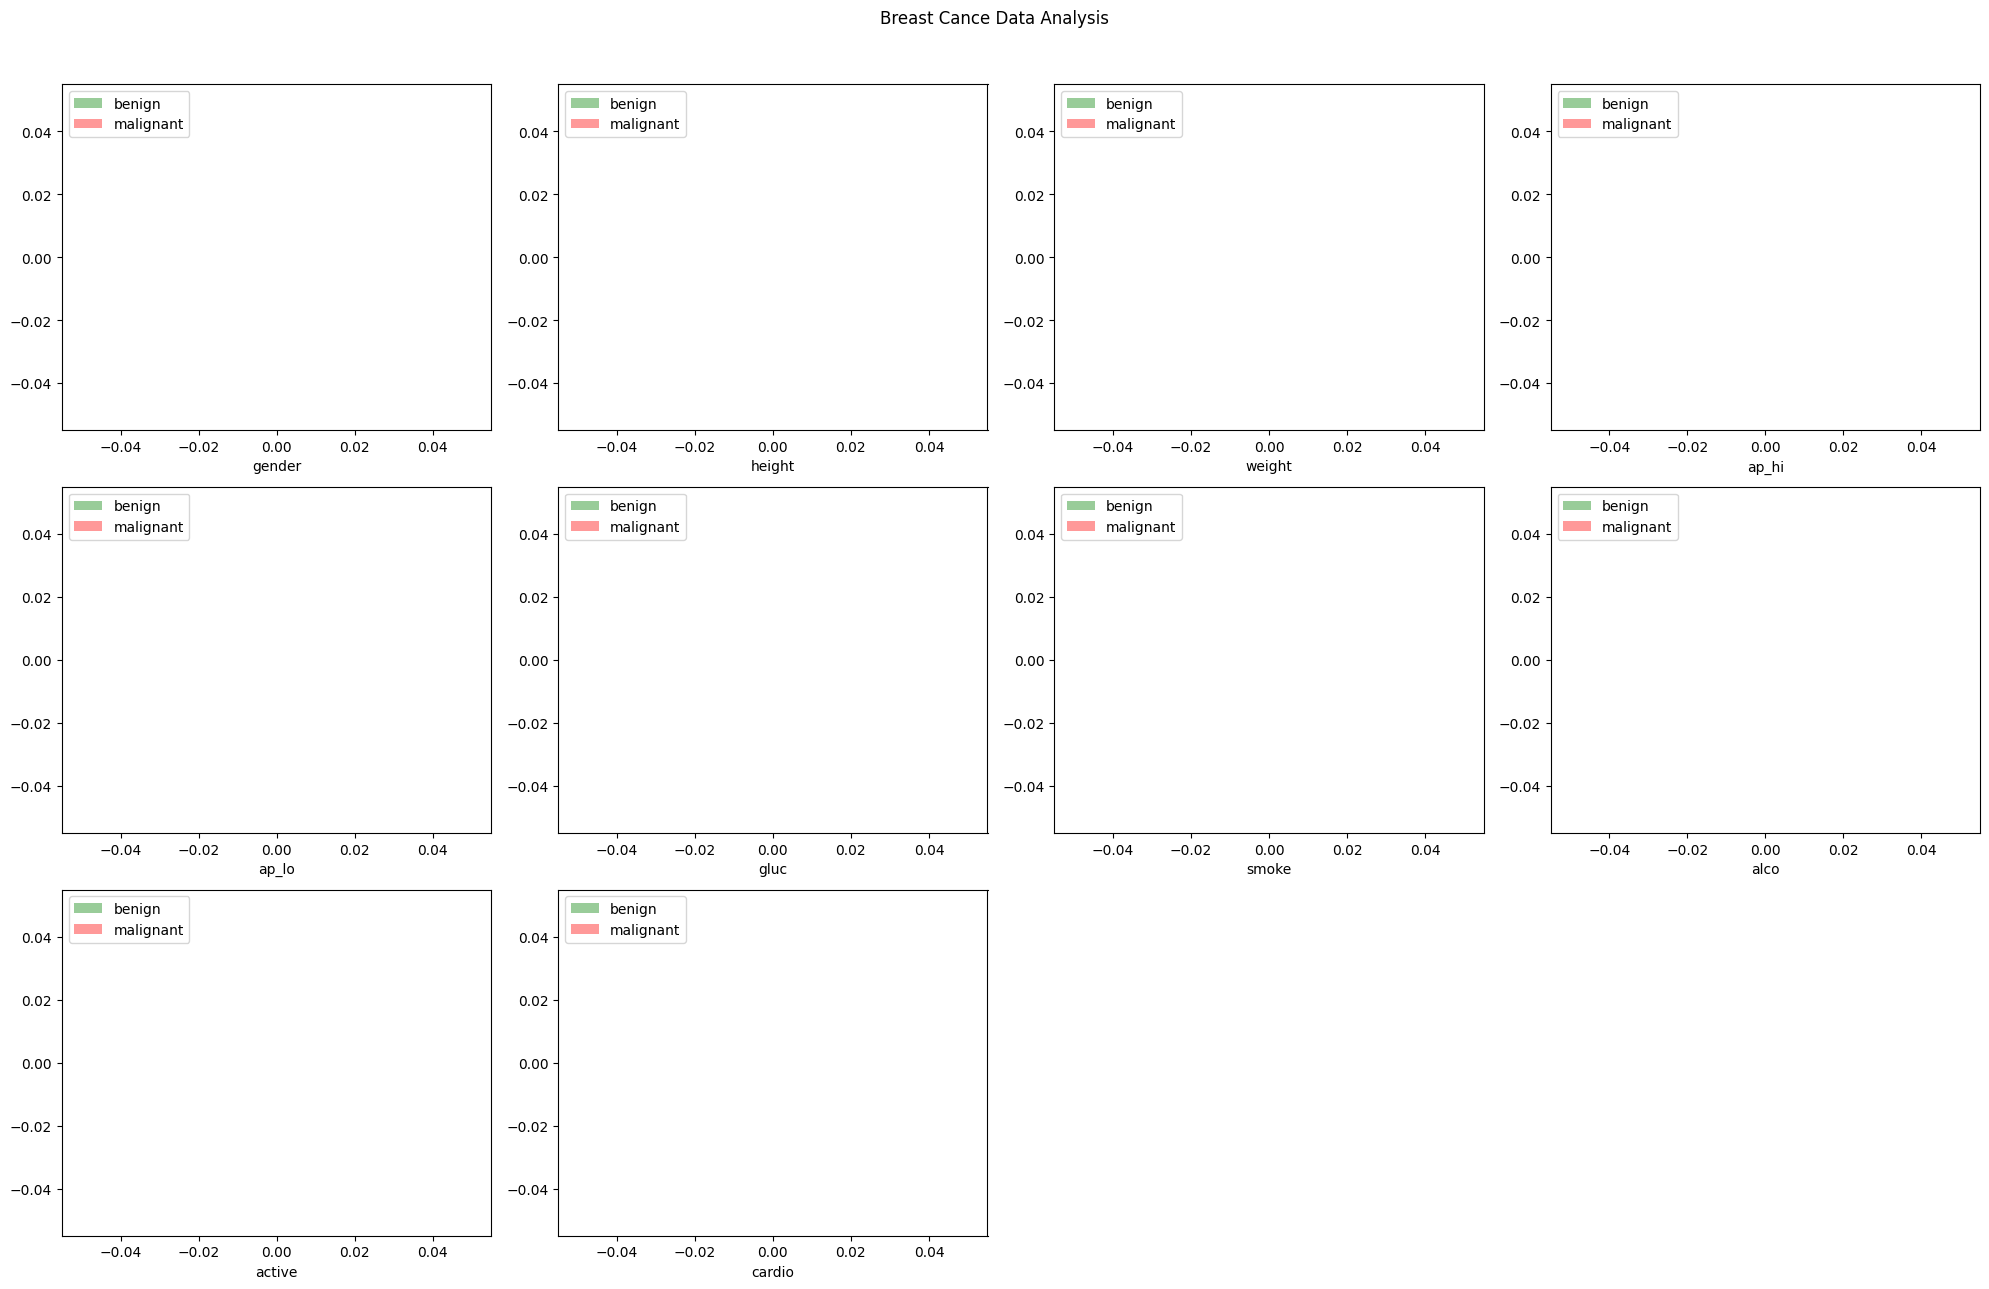

In [30]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [31]:
Y = dataset['cardio']
Y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [32]:
X = dataset.drop(['cardio'], axis = 1)
X

,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,0,0,1
1,20228,1,156,85.0,140,90,1,0,0,1
2,18857,1,165,64.0,130,70,1,0,0,0
3,17623,2,169,82.0,150,100,1,0,0,1
4,17474,1,156,56.0,100,60,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,0,1
69996,22601,1,158,126.0,140,90,2,0,0,1
69997,19066,2,183,105.0,180,90,1,0,1,0
69998,22431,1,163,72.0,135,80,2,0,0,0


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .1, random_state = 0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(n_jobs=-1,random_state = 0)


In [36]:
classifier.fit(X_train, Y_train)

LogisticRegression(n_jobs=-1, random_state=0)

In [37]:
Y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
a_score = accuracy_score(Y_test, Y_pred)
a_score

0.709

In [39]:
%pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [40]:
feat_selector = SequentialFeatureSelector(LogisticRegression(n_jobs = -1), k_features = (1,10), forward = False, floating = False, verbose = 2, scoring = "accuracy", cv=5).fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   55.2s finished

[2023-06-23 12:12:05] Features: 9/1 -- score: 0.7161904761904763[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   50.7s finished

[2023-06-23 12:12:55] Features: 8/1 -- score: 0.7163333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   45.2s finished

[2023-06-23 12:13:41] Features: 7/1 -- score: 0.7161269841269842[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [41]:
feat_selector.k_feature_names_

('0', '1', '3', '4', '6', '7', '8', '9')

In [42]:
#age, gender, weight, ap_hi, gluc, alco, active
#('0', '1', '3', '4', '6', '8', '9')